In [15]:
import pandas as pd
import sqlite3
import sqlalchemy as db
from sqlalchemy.orm import Session
import matplotlib as plt
from collections import Counter
import operator

import matplotlib.pyplot as plt

In [2]:
engine = db.create_engine('sqlite:///flights.sqlite3', echo=True)     #relative directory (in same folder as this notebook so no directory)
connection = engine.connect()
flights = db.Table('ontime', db.MetaData(), autoload=True, autoload_with=engine)
session = Session(bind=engine)
cols = flights.columns

2019-11-25 21:19:25,106 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-11-25 21:19:25,108 INFO sqlalchemy.engine.base.Engine ()
2019-11-25 21:19:25,109 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-11-25 21:19:25,110 INFO sqlalchemy.engine.base.Engine ()
2019-11-25 21:19:25,114 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("ontime")
2019-11-25 21:19:25,116 INFO sqlalchemy.engine.base.Engine ()
2019-11-25 21:19:25,137 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'ontime' AND type = 'table'
2019-11-25 21:19:25,140 INFO sqlalchemy.engine.base.Engine ()
2019-11-25 21:19:25,144 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("ontime")
2019-11-25 21:19:25,146 INFO sqlalchemy.engine.base.Engine ()
2019-11-25 21:19:25,154 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SEL

In [7]:
intervals = {
    "12:00AM-5:59AM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= 60, cols.CRSDepTime.cast(db.Integer) < 600).all(),
    "6:00AM-6:59AM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= 60, cols.CRSDepTime.cast(db.Integer) > 559, cols.CRSDepTime.cast(db.Integer) < 700).all(),
    "7:00AM-7:59AM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= 60, cols.CRSDepTime.cast(db.Integer) > 659, cols.CRSDepTime.cast(db.Integer) < 800).all(),
    "8:00AM-8:59AM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= 60, cols.CRSDepTime.cast(db.Integer) > 759, cols.CRSDepTime.cast(db.Integer) < 900).all(),
    "9:00AM-9:59AM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= 60, cols.CRSDepTime.cast(db.Integer) > 859, cols.CRSDepTime.cast(db.Integer) < 1000).all(),
    "10:00AM-10:59AM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= 60, cols.CRSDepTime.cast(db.Integer) > 959, cols.CRSDepTime.cast(db.Integer) < 1100).all(),
    "11:00AM-11:59AM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= 60, cols.CRSDepTime.cast(db.Integer) > 1059, cols.CRSDepTime.cast(db.Integer) < 1200).all(),
    "12:00PM-12:59PM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= 60, cols.CRSDepTime.cast(db.Integer) > 1159, cols.CRSDepTime.cast(db.Integer) < 1300).all(),
    "1:00PM-1:59PM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= 60, cols.CRSDepTime.cast(db.Integer) > 1259, cols.CRSDepTime.cast(db.Integer) < 1400).all(),
    "2:00PM-2:59PM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= 60, cols.CRSDepTime.cast(db.Integer) > 1359, cols.CRSDepTime.cast(db.Integer) < 1500).all(),
    "3:00PM-3:59PM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= 60, cols.CRSDepTime.cast(db.Integer) > 1459, cols.CRSDepTime.cast(db.Integer) < 1600).all(),
    "4:00PM-4:59PM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= 60, cols.CRSDepTime.cast(db.Integer) > 1559, cols.CRSDepTime.cast(db.Integer) < 1700).all(),
    "5:00PM-5:59PM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= 60, cols.CRSDepTime.cast(db.Integer) > 1659, cols.CRSDepTime.cast(db.Integer) < 1800).all(),
    "6:00PM-6:59PM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= 60, cols.CRSDepTime.cast(db.Integer) > 1759, cols.CRSDepTime.cast(db.Integer) < 1900).all(),
    "7:00PM-7:59PM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= 60, cols.CRSDepTime.cast(db.Integer) > 1859, cols.CRSDepTime.cast(db.Integer) < 2000).all(),
    "8:00PM-8:59PM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= 60, cols.CRSDepTime.cast(db.Integer) > 1959, cols.CRSDepTime.cast(db.Integer) < 2100).all(),
    "9:00PM-9:59PM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= 60, cols.CRSDepTime.cast(db.Integer) > 2059, cols.CRSDepTime.cast(db.Integer) < 2200).all(),
    "10:00PM-10:59PM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= 60, cols.CRSDepTime.cast(db.Integer) > 2159, cols.CRSDepTime.cast(db.Integer) < 2300).all(),
    "11:00PM-11:59PM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= 60, cols.CRSDepTime.cast(db.Integer) > 2259).all()
}

2019-11-25 21:47:14,840 INFO sqlalchemy.engine.base.Engine SELECT ontime."CRSDepTime" AS "ontime_CRSDepTime" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."CRSDepTime" AS INTEGER) < ?
2019-11-25 21:47:14,842 INFO sqlalchemy.engine.base.Engine (60, 600)
2019-11-25 21:47:40,069 INFO sqlalchemy.engine.base.Engine SELECT ontime."CRSDepTime" AS "ontime_CRSDepTime" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."CRSDepTime" AS INTEGER) > ? AND CAST(ontime."CRSDepTime" AS INTEGER) < ?
2019-11-25 21:47:40,070 INFO sqlalchemy.engine.base.Engine (60, 559, 700)
2019-11-25 21:48:05,607 INFO sqlalchemy.engine.base.Engine SELECT ontime."CRSDepTime" AS "ontime_CRSDepTime" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."CRSDepTime" AS INTEGER) > ? AND CAST(ontime."CRSDepTime" AS INTEGER) < ?
2019-11-25 21:48:05,608 INFO sqlalchemy.engine.base.Engine (60, 659, 800)
2019-11-25 21:48:30,795 INFO sqlalchemy.engine.base

In [9]:
interval_totals = {}
for key in intervals.keys():
    interval_totals[key] = len(intervals[key])

In [10]:
interval_totals

{'12:00AM-5:59AM': 12873,
 '6:00AM-6:59AM': 73622,
 '7:00AM-7:59AM': 99076,
 '8:00AM-8:59AM': 118969,
 '9:00AM-9:59AM': 126266,
 '10:00AM-10:59AM': 132097,
 '11:00AM-11:59AM': 153628,
 '12:00PM-12:59PM': 169337,
 '1:00PM-1:59PM': 209604,
 '2:00PM-2:59PM': 225156,
 '3:00PM-3:59PM': 257936,
 '4:00PM-4:59PM': 276554,
 '5:00PM-5:59PM': 363591,
 '6:00PM-6:59PM': 324189,
 '7:00PM-7:59PM': 310838,
 '8:00PM-8:59PM': 232540,
 '9:00PM-9:59PM': 147607,
 '10:00PM-10:59PM': 54167,
 '11:00PM-11:59PM': 17588}

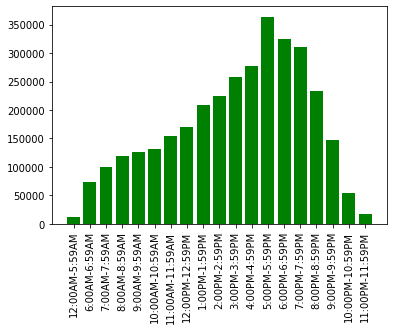

In [26]:
plt.bar(interval_totals.keys(), interval_totals.values(), width=0.8, color='g')
plt.xticks(range(len(interval_totals)), interval_totals.keys(), rotation=90)
plt.show()